In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Read Data

In [2]:
data = pd.read_csv('mushrooms.csv')
df = data.copy()

# EDA

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [44]:
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

# Data Visualization

<Axes: ylabel='class'>

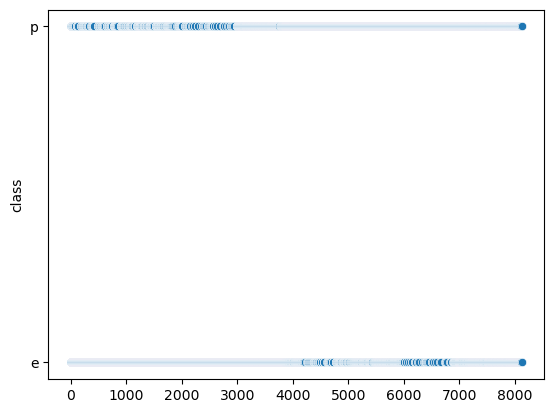

In [14]:
sns.scatterplot(df['class'])

<Axes: xlabel='class', ylabel='Count'>

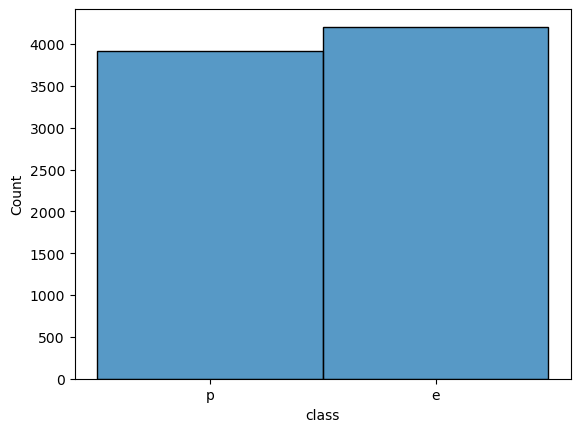

In [15]:
sns.histplot(df['class'])

# Data Preprocessing

In [18]:
# Checking missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [19]:
# Checking Duplicated values
df.duplicated().sum()

0

In [29]:
# Encoding cols
encoder = LabelEncoder()
df = df.apply(lambda col : encoder.fit_transform(col))
df.head()

# Anthor Way
"""for col in df.columns:
    df[col] = encoder.fit_transform(df[col])"""

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# (Target Variable): class
## e: eat.
## p: poisoned.

In [30]:
# Split Features and Target
x = df.drop(['class'] , axis = 1)
y = df['class']

In [32]:
# Split train & test sets
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42 , shuffle = True)

In [33]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

# Build Logistic Regression

In [35]:
lo_model = LogisticRegression()

In [36]:
lo_model.fit(x_train , y_train)

C:\Users\DE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_predict = lo_model.predict(x_test)

# Evaluation Logsitic R

In [39]:
accuracy_score(y_test , y_predict)

0.947076923076923

# DT Model

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train , y_train)
dt_y_predict = dt_model.predict(x_test)
# Evaluation
accuracy_score(y_test , dt_y_predict) , precision_score(y_test , dt_y_predict) , recall_score(y_test , dt_y_predict)

(1.0, 1.0, 1.0)

In [53]:
# the results of model is (overfitting)

# RF Model

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train , y_train)
rf_y_predict = dt_model.predict(x_test)
# Evaluation
accuracy_score(y_test , rf_y_predict) , precision_score(y_test , rf_y_predict) , recall_score(y_test , rf_y_predict)

(1.0, 1.0, 1.0)

In [55]:
# another (overfitting) !

# Best one for these data is Logistic Regression !